Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
sns.set_theme(color_codes=True)

Load Dataset

In [ ]:
data=pd.read_csv('/content/Training Data.csv',nrows=50000)

In [ ]:
#show the first five obsevations
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Dataset informations

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 50000 non-null  int64 
 1   Income             50000 non-null  int64 
 2   Age                50000 non-null  int64 
 3   Experience         50000 non-null  int64 
 4   Married/Single     50000 non-null  object
 5   House_Ownership    50000 non-null  object
 6   Car_Ownership      50000 non-null  object
 7   Profession         50000 non-null  object
 8   CITY               50000 non-null  object
 9   STATE              50000 non-null  object
 10  CURRENT_JOB_YRS    50000 non-null  int64 
 11  CURRENT_HOUSE_YRS  50000 non-null  int64 
 12  Risk_Flag          50000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 5.0+ MB


# **Data Preprocessing Part1**

In [ ]:

#Remove unnecessary attribute
data.drop(columns=['Id','CITY'],inplace=True)
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [ ]:
#Check the number of unique value from all of the object datatype
data.select_dtypes(include='object').nunique()

Married/Single      2
House_Ownership     3
Car_Ownership       2
Profession         51
STATE              29
dtype: int64

**Segment Profession into smaller unique value**

In [ ]:

data['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [ ]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession == 'Artist':
        return 'Art'
    elif profession in ['Comedian', 'Psychologist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return 'Finance/Accounting'
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return 'Science/Research'
    else:
        return 'Other'

# Apply the segmentation function to the array of unique values
data['Profession'] = data['Profession'].apply(segment_profession)


In [ ]:
data['Profession'].value_counts()

Engineering           9012
Government            5600
Other                 5574
Science/Research      4952
IT/Software           4134
Medical               3119
Aviation              2987
Design                2922
Entertainment         2152
Administration        2026
Hospitality           1945
Finance               1935
Finance/Accounting    1788
Art                    952
Education              902
Name: Profession, dtype: int64

<Axes: >

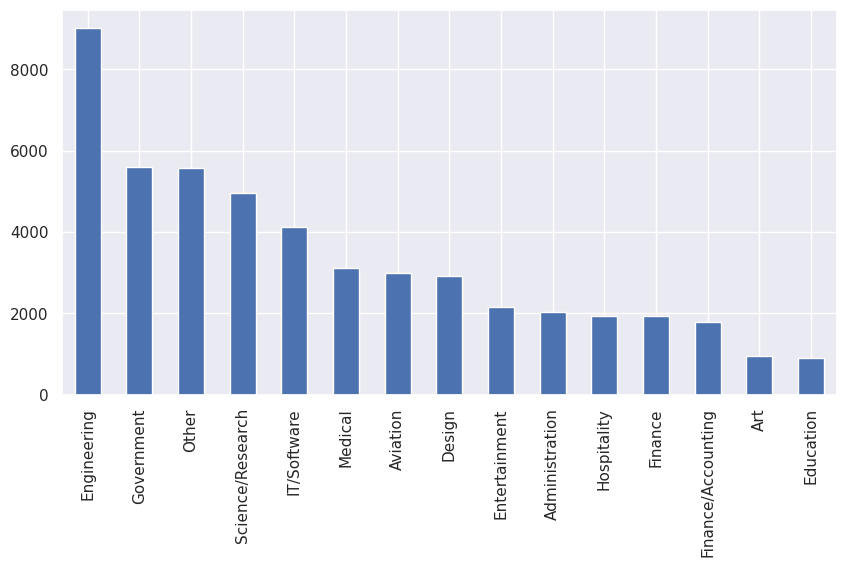

In [ ]:
plt.figure(figsize=(10,5))
data['Profession'].value_counts().plot(kind='bar')

### **Segment State into unique value**

In [ ]:
data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:

def segment_state(state):
    if state in ['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu']:
        return 'South/Central India'
    elif state in ['Gujarat', 'Rajasthan']:
        return 'West India'
    elif state in ['Telangana', 'Andhra_Pradesh']:
        return 'Telugu States'
    elif state in ['Bihar', 'West_Bengal', 'Haryana', 'Puducherry', 'Uttar_Pradesh']:
        return 'North India'
    elif state in ['Himachal_Pradesh', 'Punjab', 'Uttarakhand']:
        return 'Northwest India'
    elif state in ['Tripura', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu_and_Kashmir']:
        return 'Northeast India'
    elif state in ['Delhi', 'Chhattisgarh', 'Chandigarh']:
        return 'Central India'
    elif state in ['Uttar_Pradesh[5]', 'Manipur', 'Sikkim']:
        return 'Other'
    else:
        return 'Unknown'

# Apply the segmentation function to the array of unique values
data['STATE'] = data['STATE'].apply(segment_state)

In [ ]:
data['STATE'].value_counts()

North India            16088
South/Central India    13220
Telugu States           6486
West India              4062
Northeast India         3898
Unknown                 2355
Central India           1988
Northwest India         1490
Other                    413
Name: STATE, dtype: int64

<Axes: >

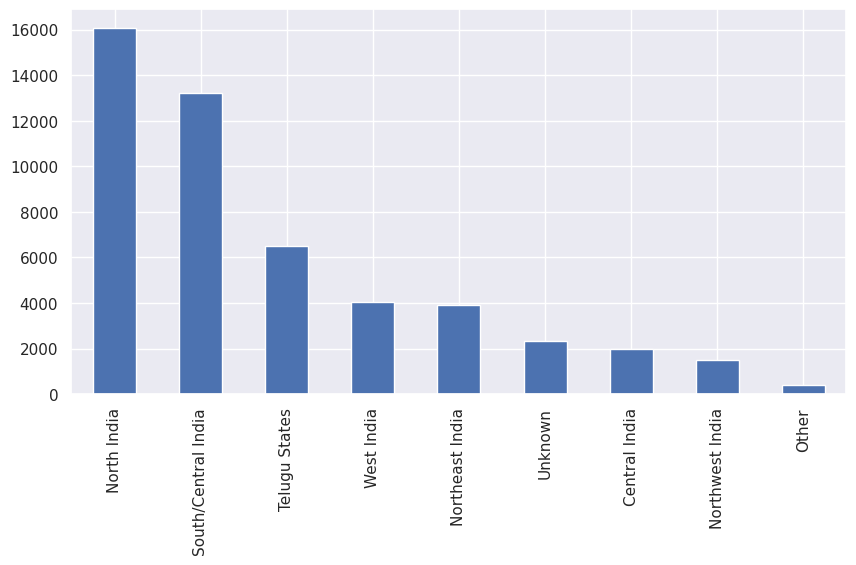

In [ ]:
plt.figure(figsize=(10,5))
data['STATE'].value_counts().plot(kind='bar')

In [ ]:

data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Engineering,South/Central India,3,13,0
1,7574516,40,10,single,rented,no,IT/Software,South/Central India,9,13,0
2,3991815,66,4,married,rented,no,IT/Software,South/Central India,4,10,0
3,6256451,41,2,single,rented,yes,IT/Software,South/Central India,2,12,1
4,5768871,47,11,single,rented,no,Government,South/Central India,3,14,1


# **Exploratory Data Analysis**

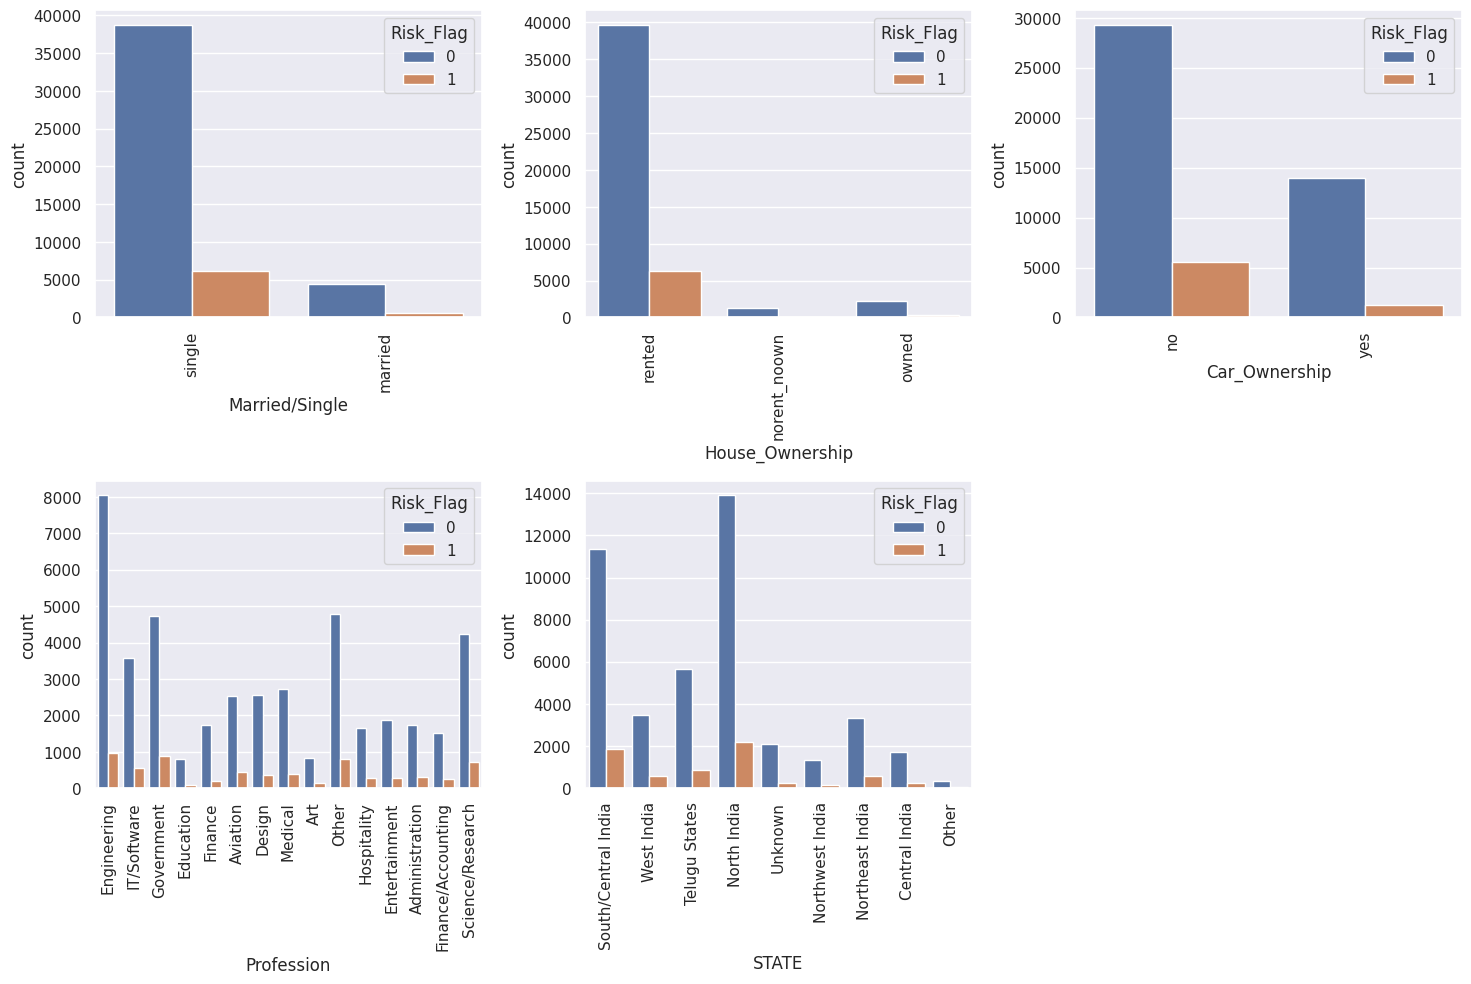

In [ ]:
#lsit of categorical variables to plot
cata_vars=['Married/Single','House_Ownership','Car_Ownership','Profession','STATE']

#create figure with subplots
fig, axs=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
axs=axs.flatten()

#create barplot for each categorical variable
for i,var in enumerate(cata_vars):
    sns.countplot(x=var,hue='Risk_Flag',data=data,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

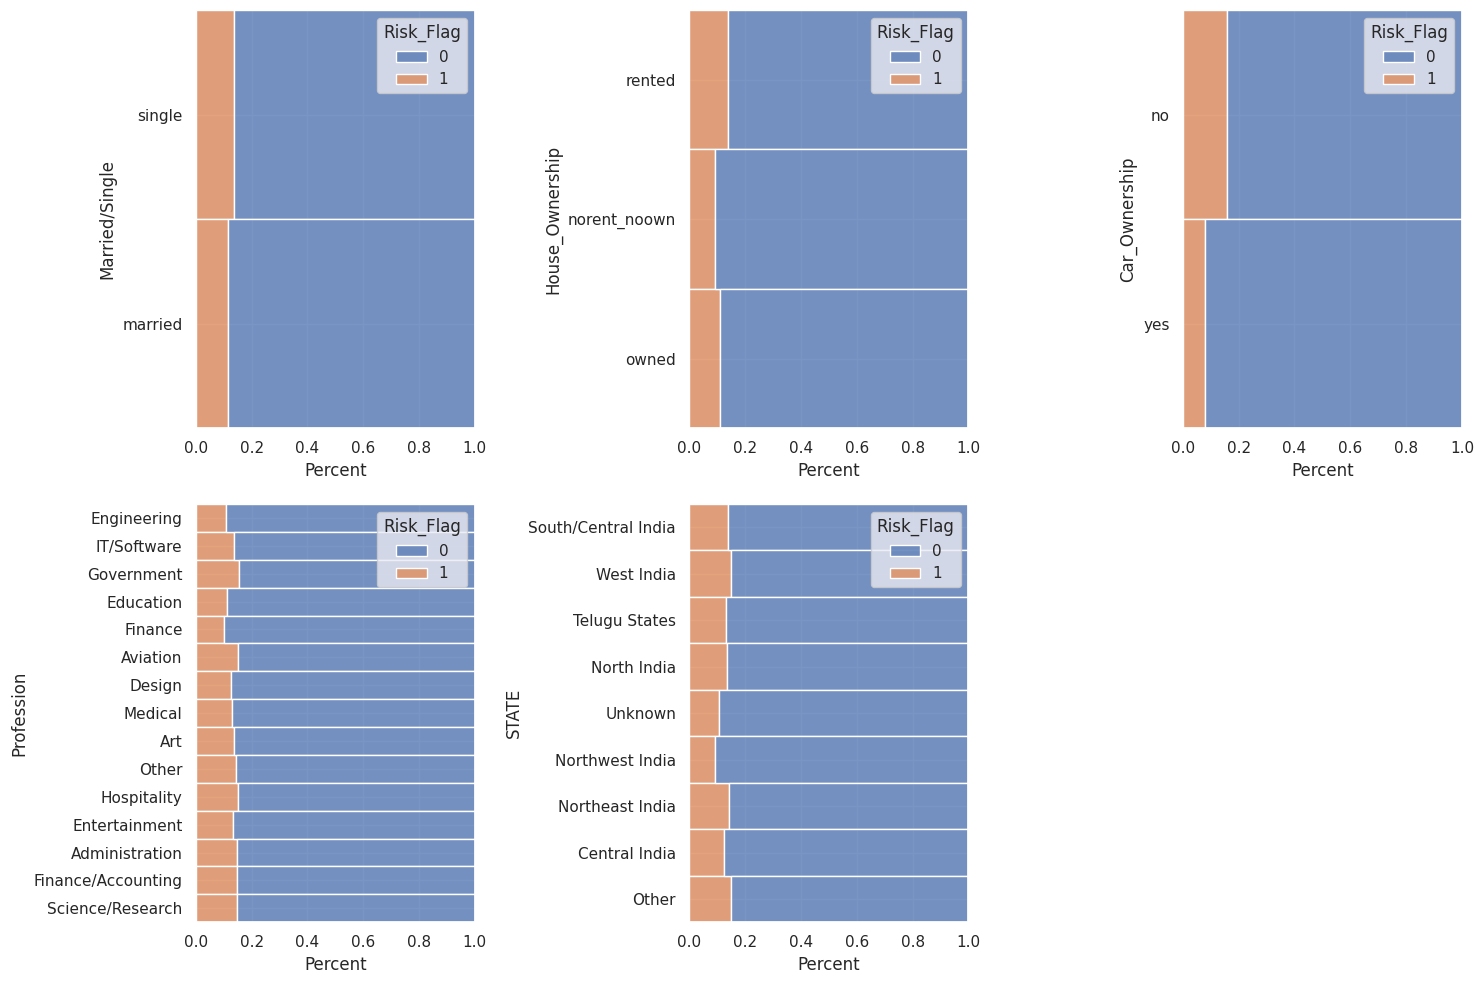

In [ ]:

#get list of categorical variables
cata_vars=['Married/Single','House_Ownership','Car_Ownership','Profession','STATE']

#create figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
axs=axs.flatten()

#create histplot for each categorical varibale
for i,var in enumerate(cata_vars):
    sns.histplot(y=var,hue='Risk_Flag',data=data,ax=axs[i],multiple='fill',kde=False,fill=True,element='bars',stat='percent')
    axs[i].set_yticklabels(data[var].unique())


#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()


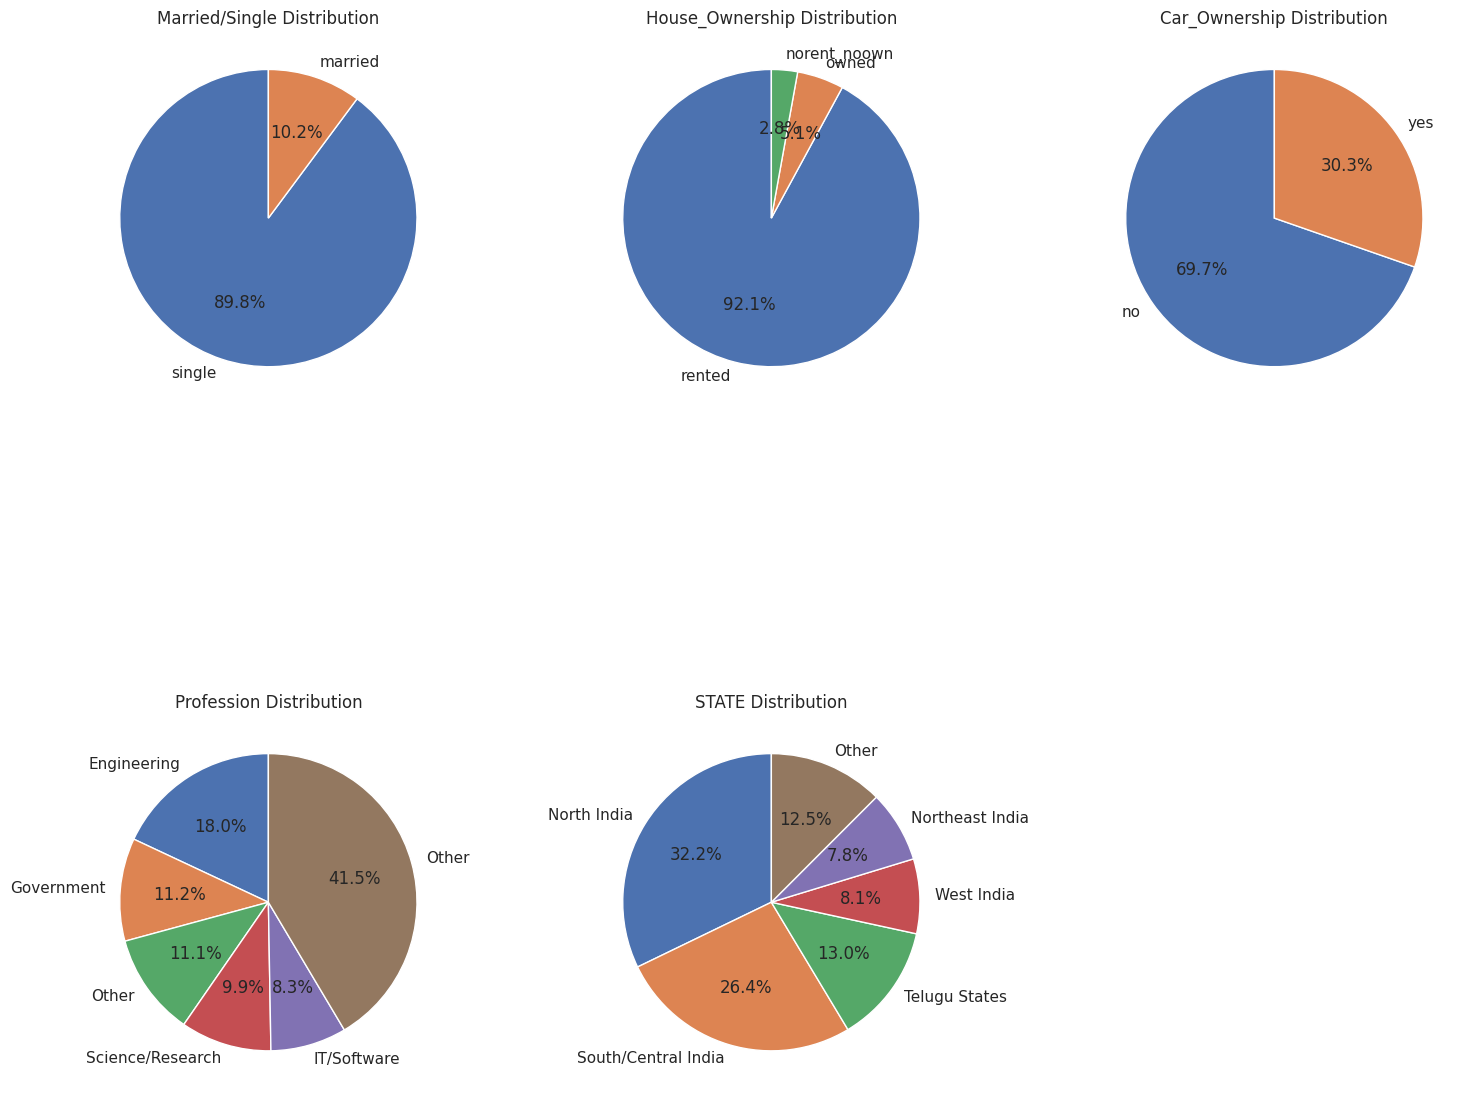

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'STATE']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove sixth plot
fig.delaxes(axs[1][2])

# Show the plot
plt.show()

### **Data Preprocessing part 2**

In [ ]:

#chechking missing values
data.isna().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### **Label Encoding for each object datatype**

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Engineering' 'IT/Software' 'Government' 'Education' 'Finance' 'Aviation'
 'Design' 'Medical' 'Art' 'Other' 'Hospitality' 'Entertainment'
 'Administration' 'Finance/Accounting' 'Science/Research']
STATE: ['South/Central India' 'West India' 'Telugu States' 'North India'
 'Unknown' 'Northwest India' 'Northeast India' 'Central India' 'Other']


In [ ]:
lst=['Married/Single','House_Ownership','Car_Ownership','Profession','STATE',]
label_encoder=LabelEncoder()
for col in lst:
    data[col]=label_encoder.fit_transform(data[col])
    print(f"{col}:{data[col].unique()}")

Married/Single:[1 0]
House_Ownership:[2 0 1]
Car_Ownership:[0 1]
Profession:[ 5 11  9  4  7  2  3 12  1 13 10  6  0  8 14]
STATE:[5 8 6 1 7 3 2 0 4]


# **Correlation Heatmap**

<Axes: >

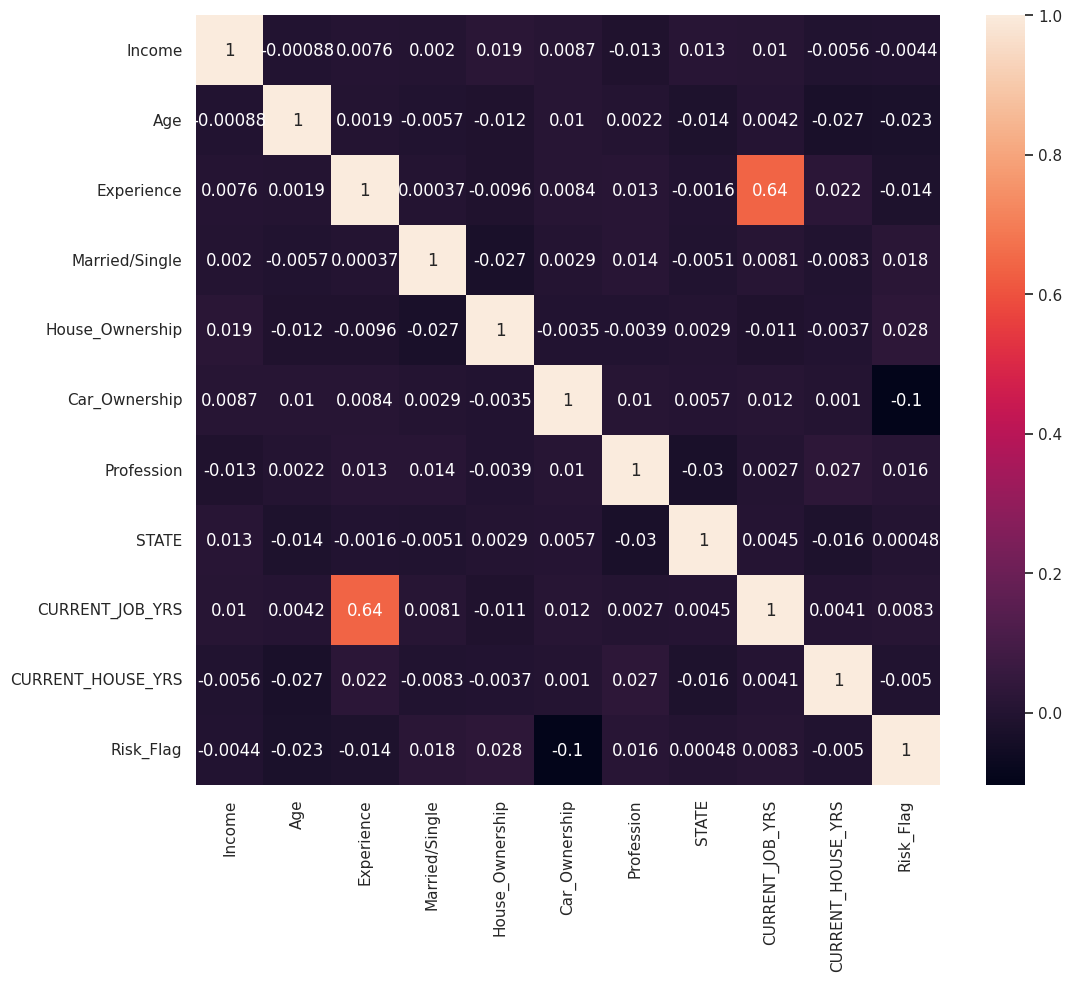

In [ ]:

#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

### Train Test split

In [ ]:

#select the features(X) and the target(y)
X=data.drop('Risk_Flag',axis=1)
y=data['Risk_Flag']

In [ ]:
y.value_counts()

0    43257
1     6743
Name: Risk_Flag, dtype: int64

<Axes: xlabel='Risk_Flag', ylabel='count'>

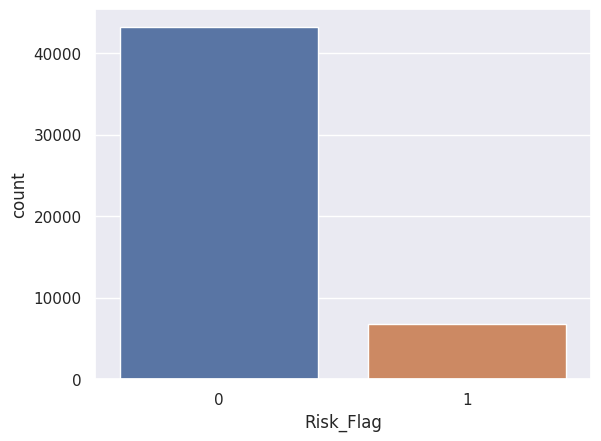

In [ ]:
sns.countplot(x=y)

In [ ]:

#scaling feature(X)
st_sc=StandardScaler()
X=st_sc.fit_transform(X)

#split the into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=100)

# **Algorithms**

## **KNeighborsClassifier**

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21603
           1       0.76      0.75      0.75      3397

    accuracy                           0.93     25000
   macro avg       0.86      0.85      0.86     25000
weighted avg       0.93      0.93      0.93     25000

Accuracy Score: 93.38 %


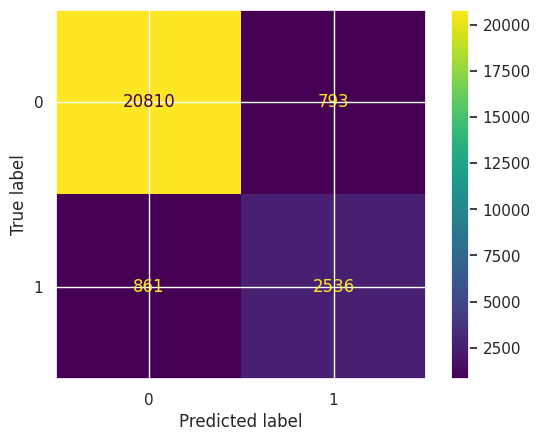

In [ ]:

knn_model=KNeighborsClassifier(n_neighbors=60,algorithm='ball_tree',n_jobs=100,weights='distance')
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## **DecisionTreeClassifier**

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     21603
           1       0.75      0.75      0.75      3397

    accuracy                           0.93     25000
   macro avg       0.86      0.85      0.86     25000
weighted avg       0.93      0.93      0.93     25000

Accuracy Score: 93.26 %


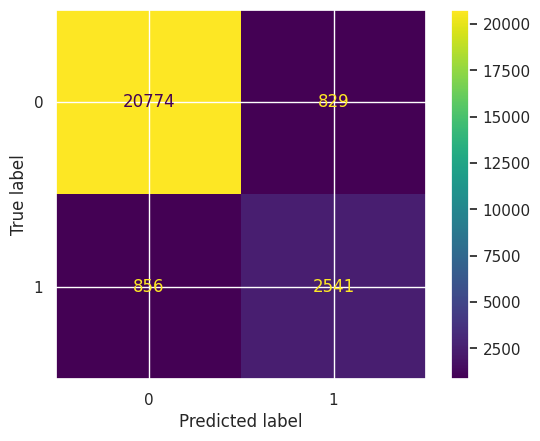

In [ ]:
tree_model=DecisionTreeClassifier(criterion='log_loss')
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **RandomForestClassifier--Best Accuracy**

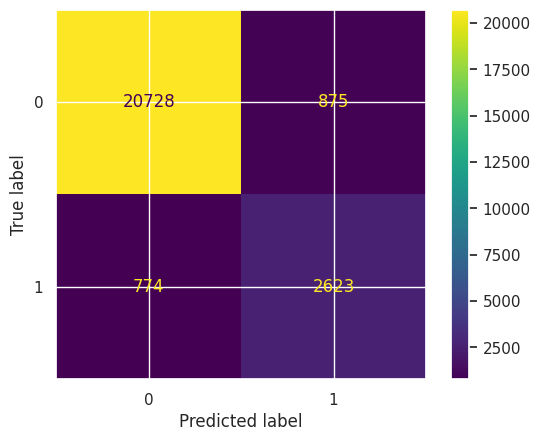

In [ ]:
for_model=RandomForestClassifier(criterion='gini',n_estimators=200,n_jobs=100)
for_model.fit(X_train,y_train)
y_pred=for_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **AdaBoostClassifier**

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     21603
           1       1.00      0.00      0.00      3397

    accuracy                           0.86     25000
   macro avg       0.93      0.50      0.46     25000
weighted avg       0.88      0.86      0.80     25000

Accuracy Score: 86.42 %


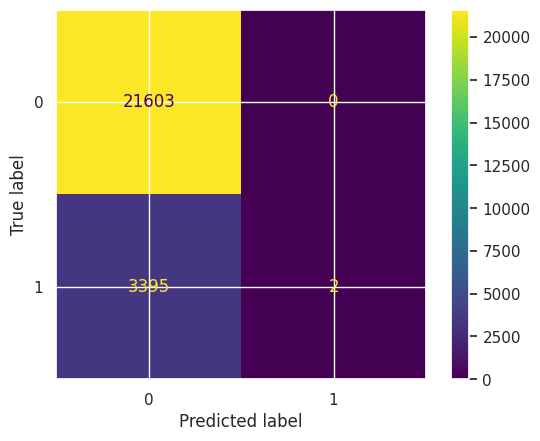

In [ ]:
adb_model=AdaBoostClassifier()
adb_model.fit(X_train,y_train)
y_pred=adb_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## **GaussianNB**

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     21603
           1       0.00      0.00      0.00      3397

    accuracy                           0.86     25000
   macro avg       0.43      0.50      0.46     25000
weighted avg       0.75      0.86      0.80     25000

Accuracy Score: 86.41 %


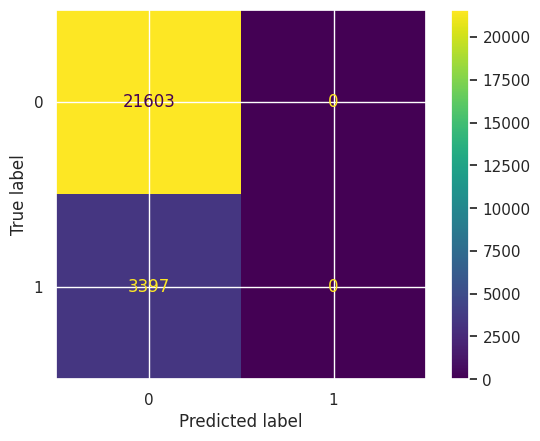

In [ ]:
gb_model=GaussianNB()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

## **SVC**

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     21603
           1       0.00      0.00      0.00      3397

    accuracy                           0.86     25000
   macro avg       0.43      0.50      0.46     25000
weighted avg       0.75      0.86      0.80     25000

Accuracy Score: 86.41 %


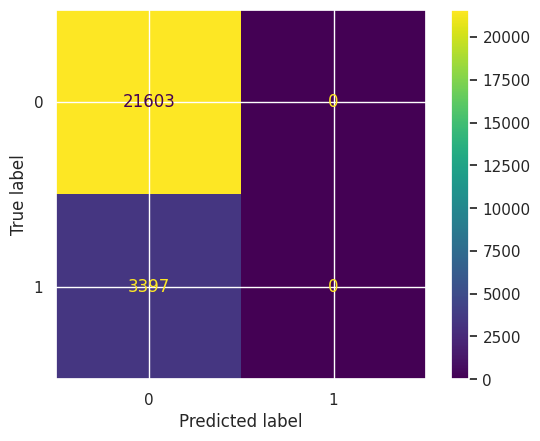

In [ ]:

svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **Plot Algorithm Accuracy**

In [ ]:
clf=[knn_model,tree_model,for_model,svc_model,gb_model,adb_model]
model_column=[]
compare=pd.DataFrame(columns=model_column)
row_index = 0

for model_acu in clf:
    fit_train=model_acu.fit(X_train,y_train)
    predict=model_acu.predict(X_test)
    algo_name=model_acu.__class__.__name__
    compare.loc[row_index,'Name'] = algo_name
    compare.loc[row_index, 'Train Accuracy'] = round(model_acu.score(X_train, y_train)*100, 2)
    compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predict)*100,2)
    compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predict)*100,2)
    compare.loc[row_index, 'f1-score'] = round(f1_score(y_test,predict)*100,2)

    row_index+=1

compare.sort_values(by = ['Train Accuracy'], ascending = False, inplace = True)
compare

,Name,Train Accuracy,Precission,Recall,f1-score
0,KNeighborsClassifier,95.82,76.18,74.65,75.41
1,DecisionTreeClassifier,95.82,75.54,74.80,75.17
2,RandomForestClassifier,95.82,75.09,76.86,75.97
5,AdaBoostClassifier,86.64,100.00,0.06,0.12
3,SVC,86.62,0.00,0.00,0.00
4,GaussianNB,86.62,0.00,0.00,0.00


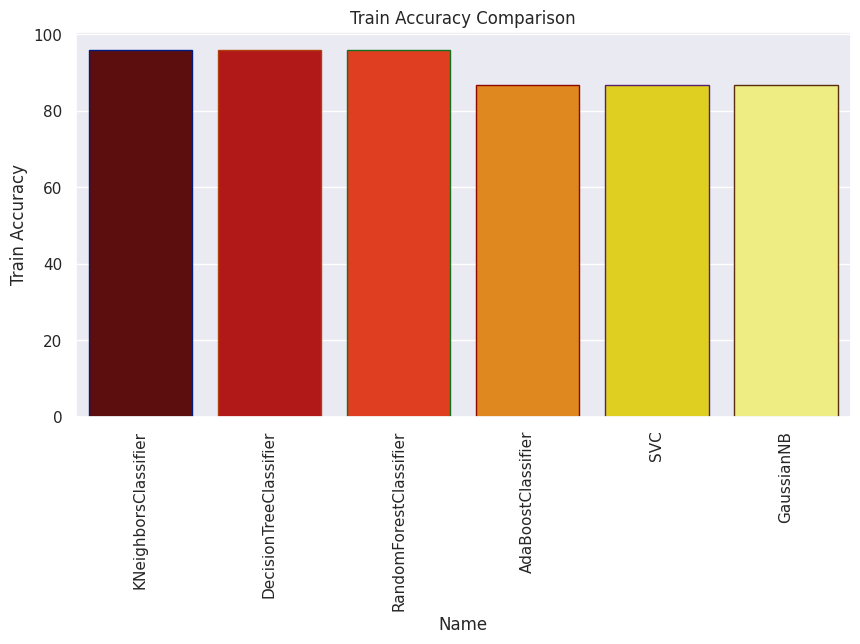

In [ ]:

plt.subplots(figsize=(10,5))
sns.barplot(x="Name", y="Train Accuracy",data=compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Train Accuracy Comparison')
plt.show()

# **Balancing Dataset**

**over_sampling**

In [ ]:
y_train.value_counts()

0    21654
1     3346
Name: Risk_Flag, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_sm.value_counts()

0    21654
1    21654
Name: Risk_Flag, dtype: int64

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     21603
           1       0.73      0.83      0.78      3397

    accuracy                           0.94     25000
   macro avg       0.85      0.89      0.87     25000
weighted avg       0.94      0.94      0.94     25000

Accuracy Score: 93.51 %


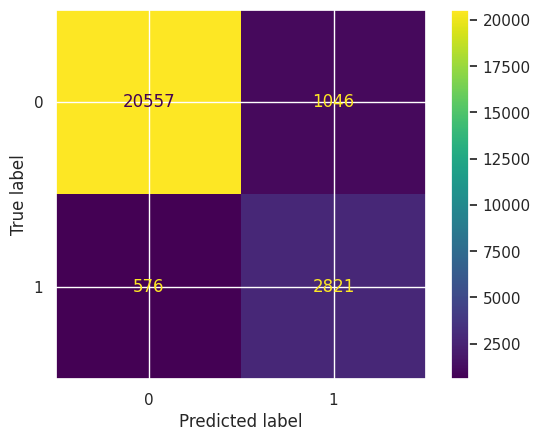

In [ ]:

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train_sm,y_train_sm)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Under_sampling**

In [ ]:

from imblearn.under_sampling import RandomUnderSampler
ran=RandomUnderSampler()
X_train_ran,y_train_ran=sm.fit_resample(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     21603
           1       0.73      0.82      0.77      3397

    accuracy                           0.93     25000
   macro avg       0.85      0.89      0.87     25000
weighted avg       0.94      0.93      0.94     25000

Accuracy Score: 93.46 %


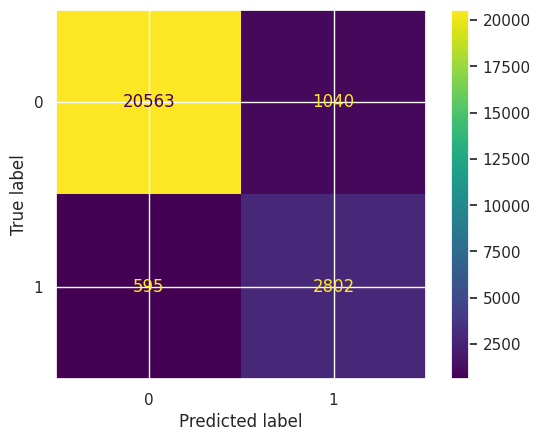

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train_ran,y_train_ran)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))